<a href="https://colab.research.google.com/github/Mrunmaigaikwad1/PRODIGY_DS_05/blob/main/PRODIGY_DS_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib seaborn geopandas folium


In [7]:
import pandas as pd

# Load the dataset
file_path = '/content/Kaagle_Upload.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Display basic information about the dataset
print(df.info())
print(df.head())  # View the first few rows of the dataset


<ipython-input-7-f224ff0f8046>:5: DtypeWarning: Columns (0,55) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285331 entries, 0 to 285330
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   accident_index                                    285331 non-null  object 
 1   vehicle_reference                                 285331 non-null  int64  
 2   vehicle_type                                      285331 non-null  int64  
 3   towing_and_articulation                           285331 non-null  int64  
 4   vehicle_manoeuvre                                 285331 non-null  int64  
 5   vehicle_location-restricted_lane                  285331 non-null  int64  
 6   junction_location                                 285331 non-null  int64  
 7   skidding_and_overturning                          285331 non-null  int64  
 8   hit_object_in_carriageway                         285331 non-null  int64  
 9   vehi

In [9]:
# Print all column names
print("Columns in dataset:", df.columns)


Columns in dataset: Index(['accident_index', 'vehicle_reference', 'vehicle_type',
       'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_(cc)', 'propulsion_code',
       'age_of_vehicle', 'driver_imd_decile', 'driver_home_area_type',
       'vehicle_imd_decile', 'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_(district)', 'local

In [10]:
# Drop rows with missing values in key columns
df = df.dropna(subset=['road_surface_conditions', 'weather_conditions', 'time', 'latitude', 'longitude'])

# Convert `time` column to a time-based category (Morning, Afternoon, Evening, Night)
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Ensure the time column is in datetime format before extracting the hour
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df['Time_Category'] = df['time'].dt.hour.apply(categorize_time)


<ipython-input-10-cacf3ceac3ae>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['time'], errors='coerce')
<ipython-input-10-cacf3ceac3ae>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time_Category'] = df['time'].dt.hour.apply(categorize_time)


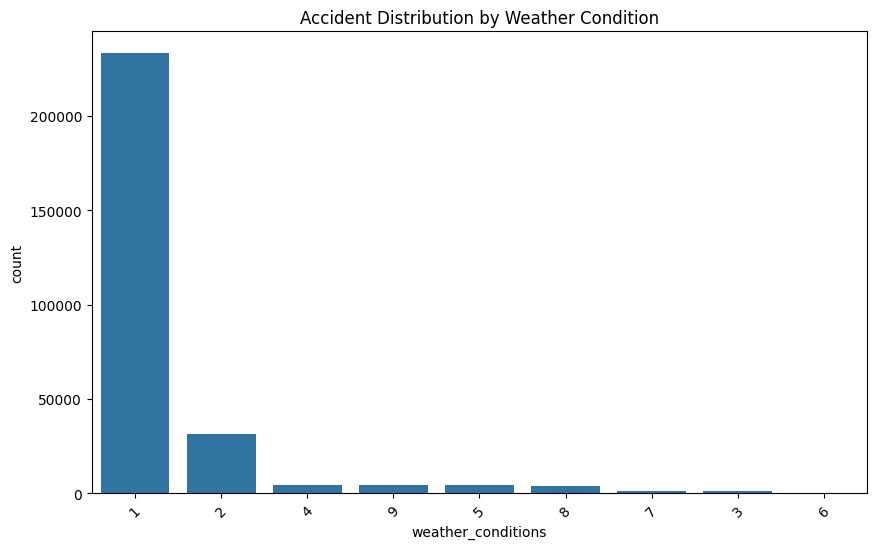

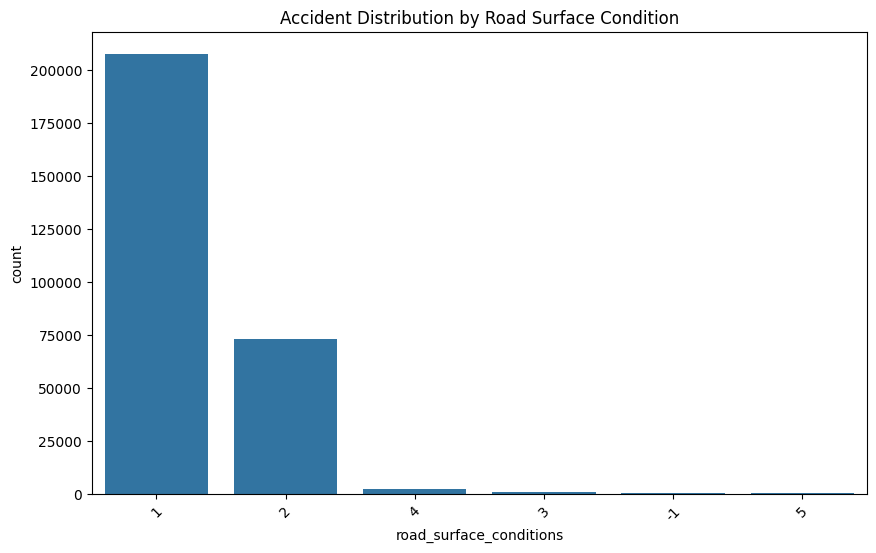

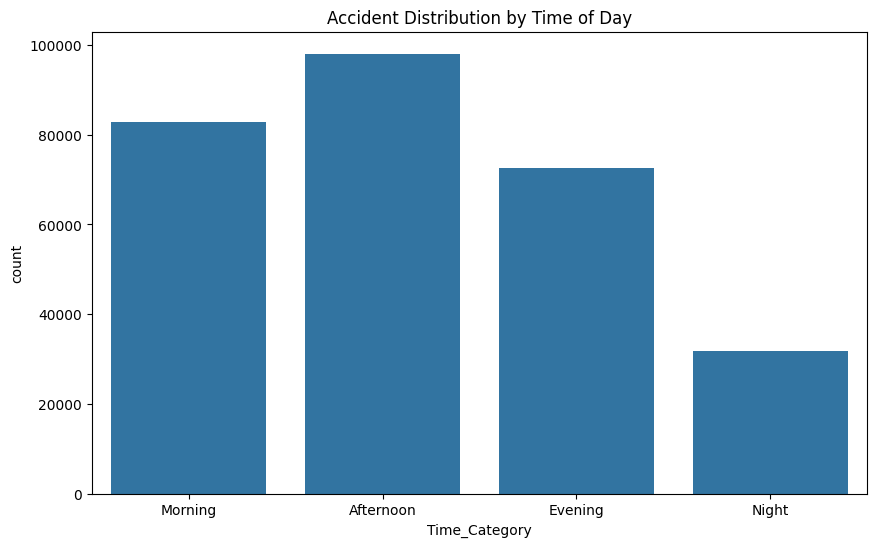

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accident distribution by weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather_conditions', order=df['weather_conditions'].value_counts().index)
plt.title('Accident Distribution by Weather Condition')
plt.xticks(rotation=45)
plt.show()

# Accident distribution by road surface conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='road_surface_conditions', order=df['road_surface_conditions'].value_counts().index)
plt.title('Accident Distribution by Road Surface Condition')
plt.xticks(rotation=45)
plt.show()

# Accident distribution by time of day
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time_Category', order=['Morning', 'Afternoon', 'Evening', 'Night'])
plt.title('Accident Distribution by Time of Day')
plt.show()


In [12]:
import folium
from folium.plugins import HeatMap

# Initialize a map centered around the mean latitude and longitude
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Create heatmap data from accident locations
heat_data = [[row['latitude'], row['longitude']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(m)

# Save map as HTML file
m.save('accident_hotspots.html')
print("Hotspot map saved as accident_hotspots.html")


Hotspot map saved as accident_hotspots.html


Time_Category                               Afternoon  Evening  Morning  Night
road_surface_conditions weather_conditions                                    
-1                      1                          63       41       83     15
                        2                           0        2        2      0
                        4                           3        3        0      0
                        5                           0        3        3      0
                        7                           0        0        4      0
                        8                          13        5       13      7
                        9                         110       74       67     34
 1                      1                       73342    50110    55829  20389
                        2                          62       73       73     22
                        3                           4        0        4      0
                        4                        120

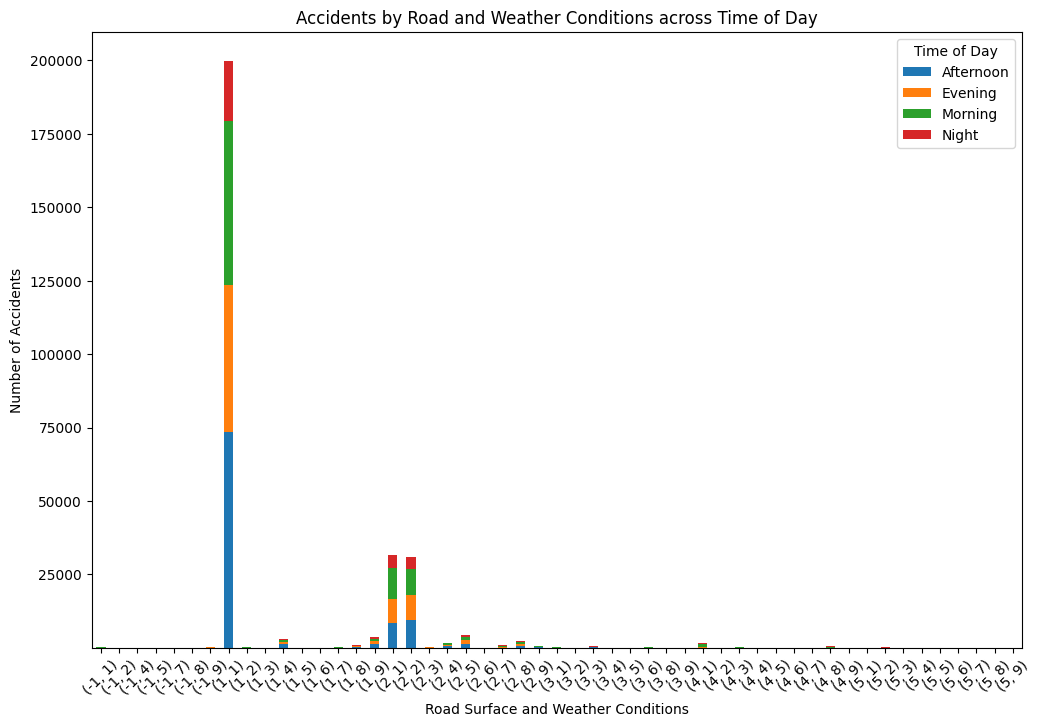

In [13]:
# Cross-tabulation to observe interactions between road conditions, weather, and time
road_weather_time = pd.crosstab(index=[df['road_surface_conditions'], df['weather_conditions']], columns=df['Time_Category'])
print(road_weather_time)

# Visualize with a stacked bar plot
road_weather_time.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Accidents by Road and Weather Conditions across Time of Day")
plt.xlabel("Road Surface and Weather Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Time of Day")
plt.xticks(rotation=45)
plt.show()


Time_Category                               Afternoon  Evening  Morning  Night
road_surface_conditions weather_conditions                                    
-1                      1                          63       41       83     15
                        2                           0        2        2      0
                        4                           3        3        0      0
                        5                           0        3        3      0
                        7                           0        0        4      0
                        8                          13        5       13      7
                        9                         110       74       67     34
 1                      1                       73342    50110    55829  20389
                        2                          62       73       73     22
                        3                           4        0        4      0
                        4                        120

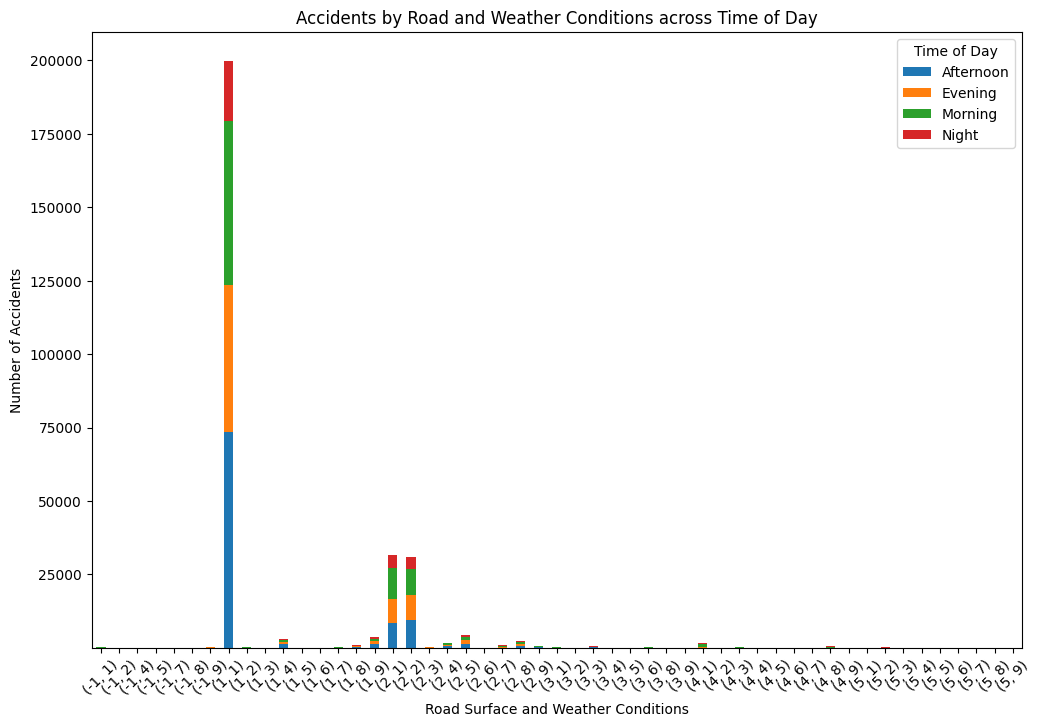

In [14]:
# Cross-tabulation to observe interactions between road conditions, weather, and time
road_weather_time = pd.crosstab(index=[df['road_surface_conditions'], df['weather_conditions']], columns=df['Time_Category'])
print(road_weather_time)

# Visualize with a stacked bar plot
road_weather_time.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title("Accidents by Road and Weather Conditions across Time of Day")
plt.xlabel("Road Surface and Weather Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Time of Day")
plt.xticks(rotation=45)
plt.show()
